In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import pickle



In [241]:
dataset = pd.read_csv('Data/user_dataset.csv')
dateset = dataset.fillna(0)


In [242]:
y = dataset.users
X = dataset.drop(columns = {'Unnamed: 0', 'users'}, axis = 1)

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [244]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [245]:
r2_score(y_pred, y_test, multioutput='uniform_average')

0.5926565829525883

In [246]:
mean_squared_error(y_test, y_pred)

31.473914548997314

In [247]:
y_test = y_test.reset_index().drop('index', axis = 1)

(300.0, 550.0)

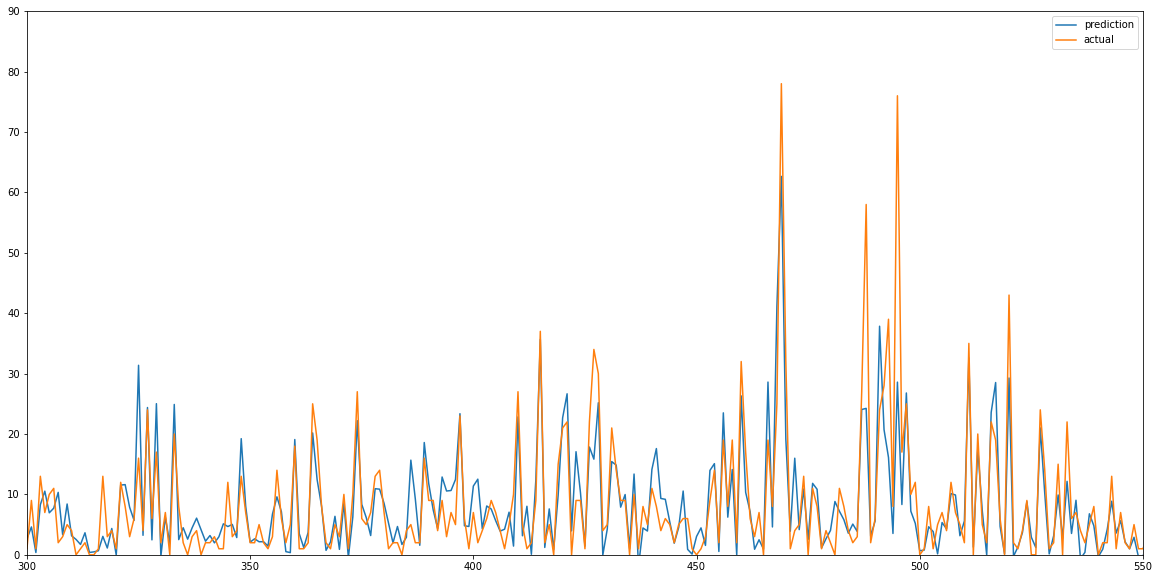

In [248]:
plt.figure(figsize=(20, 10))
plt.plot(y_pred, label ='prediction')
plt.plot(y_test, label = 'actual')
plt.legend()
plt.ylim(0,90)
plt.xlim(300, 550)



In [249]:
a1 = pd.DataFrame(X.columns)
a2 = pd.DataFrame(model.coef_)
feature_importance = pd.concat([a1,a2], axis =1)
feature_importance.columns = ['name','value']
value_features = feature_importance[feature_importance.value > 0]


In [250]:
X_new = dataset[value_features['name'].values.tolist()]

In [251]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.33, random_state=42)

In [270]:
model_new = lm.fit(X_train_new, y_train_new)
y_pred_new = model_new.predict(X_test_new)

In [271]:
r2_score(y_pred_new, y_test_new, multioutput='uniform_average')

0.5740590593835695

In [272]:
mean_squared_error(y_test, y_pred)

31.473914548997314

In [273]:
y_test_new = y_test_new.reset_index().drop('index', axis = 1)

(300.0, 550.0)

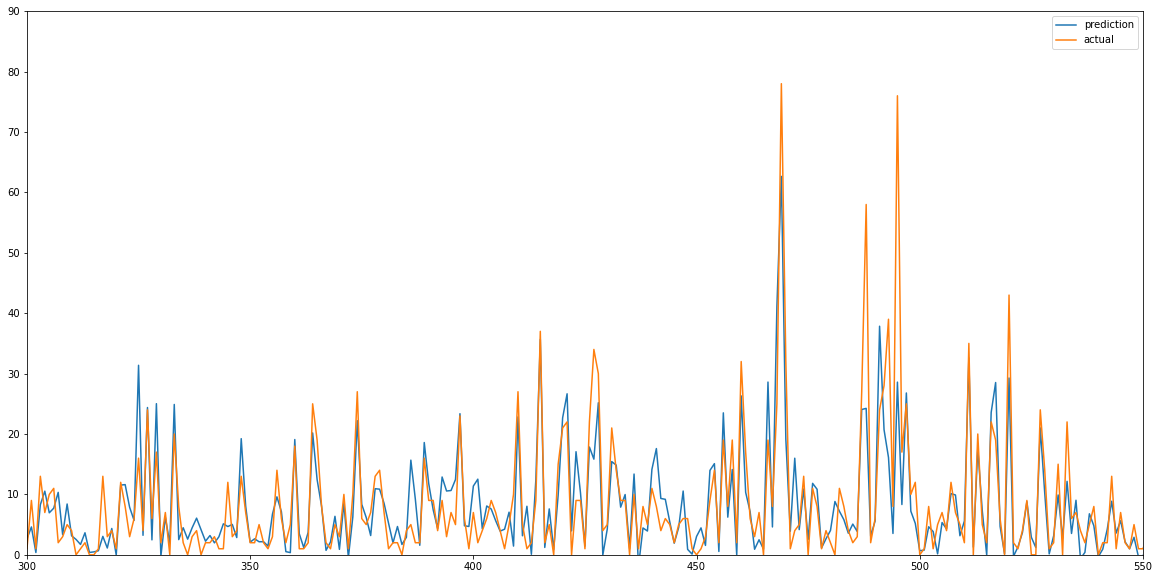

In [274]:
plt.figure(figsize=(20, 10))
plt.plot(y_pred, label ='prediction')
plt.plot(y_test, label = 'actual')
plt.legend()
plt.ylim(0,90)
plt.xlim(300, 550)

In [275]:
train_dataset = pd.concat([X_new,y], axis = 1)
train_dataset.to_csv('Data/train_dataset.csv')

In [277]:
# save the model to disk
pickle.dump(model_new, open('Models/User_pred.pkl', 'wb'))

In [265]:
users_prediction = {}

for i in range(180):
    price_opt_data = pd.read_csv('Data/opt_price' + str(i) + '.csv')
    users_features = price_opt_data.drop(['Unnamed: 0', 'grid_id'], axis = 1).fillna(0)
    users_vol = model_new.predict(users_features).mean()
    users_prediction[str(i)] = users_vol
    
  

In [266]:
opt = pd.DataFrame(list(sorted(users_prediction.items(), key=lambda x:x[1], reverse=True)))
opt.to_csv('Data/opt.csv')